In [103]:
from math import sqrt
from typing import Any
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [104]:
class Tsp:

    def __init__(self, num_cities: int, seed: Any = None) -> None:
        if seed is None:
            seed = num_cities
        self._num_cities = num_cities
        self._graph = nx.DiGraph()
        np.random.seed(seed)
        for c in range(num_cities):
            self._graph.add_node(c, pos=(np.random.random(), np.random.random()))

    def distance(self, n1, n2) -> int:
        pos1 = self._graph.nodes[n1]['pos']
        pos2 = self._graph.nodes[n2]['pos']
        return round(1_000_000 / self._num_cities * sqrt((pos1[0] - pos2[0])**2 +
                                                         (pos1[1] - pos2[1])**2))

    def evaluate_solution(self, solution: np.array) -> float:
        total_cost = 0
        tmp = solution.tolist() + [solution[0]]
        for n1, n2 in (tmp[i:i + 2] for i in range(len(tmp) - 1)):
            total_cost += self.distance(n1, n2)
        return total_cost

    def plot(self, path: np.array = None) -> None:
        if path is not None:
            self._graph.remove_edges_from(list(self._graph.edges))
            tmp = path.tolist() + [path[0]]
            for n1, n2 in (tmp[i:i + 2] for i in range(len(tmp) - 1)):
                self._graph.add_edge(n1, n2)
        plt.figure(figsize=(12, 5))
        nx.draw(self._graph,
                pos=nx.get_node_attributes(self._graph, 'pos'),
                with_labels=True,
                node_color='pink')
        if path is not None:
            plt.title(f"Current path: {self.evaluate_solution(path):,}")
        plt.show()

    @property
    def graph(self) -> nx.digraph:
        return self._graph

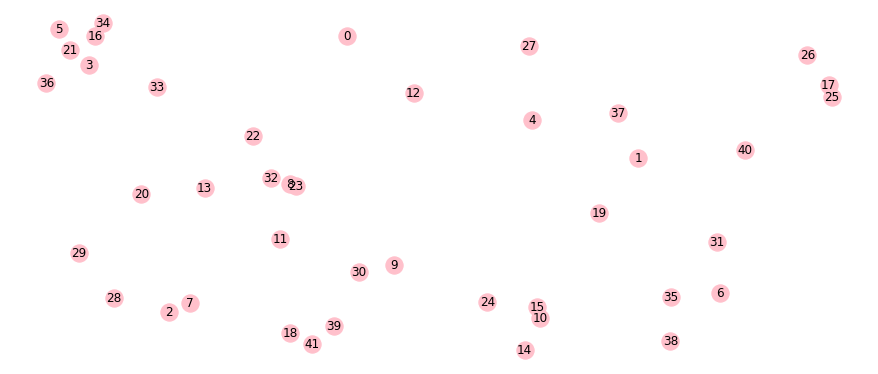

In [105]:
NUM_CITIES = 42

problem = Tsp(NUM_CITIES)
problem.plot()

In [106]:
def refine(solution: np.array, *, pm: float = 1/NUM_CITIES) -> np.array:
    new_solution = solution.copy()
    tmp_sol = solution.copy()
    cost = problem.evaluate_solution(new_solution)
    p = None
    i1 = np.random.randint(0, NUM_CITIES)
    i2 = np.random.randint(0, NUM_CITIES)
    new_cost = np.Infinity

    while p is None or p < pm:
        #while i2 < NUM_CITIES:
        if i2 != i1 :
            temp = new_solution[i1]
            new_solution[i1] = new_solution[i2]
            new_solution[i2] = temp
            
            new_cost=problem.evaluate_solution(new_solution)
            if new_cost<cost:
                tmp_sol=new_solution.copy()
                
        #i2+=1

        p = np.random.random()
    
    return tmp_sol

In [107]:
def tweak(solution: np.array, *, pm: float = 1/NUM_CITIES) -> np.array:
    new_solution = solution.copy()
    tmp_sol = solution.copy()
    cost = problem.evaluate_solution(new_solution)
    p = None
    i1 = np.random.randint(0, NUM_CITIES)
    i2 = np.random.randint(0, NUM_CITIES)
    edit = 0
    new_cost = np.Infinity

    while p is None or p < pm:
        while i2 < NUM_CITIES:
            new_solution=tmp_sol.copy()
            if i2 > i1 :
                temp = new_solution[i1]
                new_solution[i1] = new_solution[i2]
                new_solution[i2] = temp

                new_solution = np.hstack([new_solution[:i1], np.flip(new_solution[i1:i2]), new_solution[i2:]])
                
                new_cost=problem.evaluate_solution(new_solution)
                if new_cost<cost:
                    tmp_sol=new_solution.copy()
                    edit=1
                
            if i2 < i1 :
                #temp = new_solution[i1]
                #new_solution[i1] = new_solution[i2]
                #new_solution[i2] = temp

                new_solution = np.hstack([new_solution[:i2], np.flip(new_solution[i2:i1]), new_solution[i1:]])
                
                new_cost=problem.evaluate_solution(new_solution)
                if new_cost<cost:
                    tmp_sol=new_solution.copy()
                    edit=1
                
            i2+=1

            

        p = np.random.random()

    if edit == 0:
        tmp_sol=refine(tmp_sol, pm=.5)
    
    
    return tmp_sol

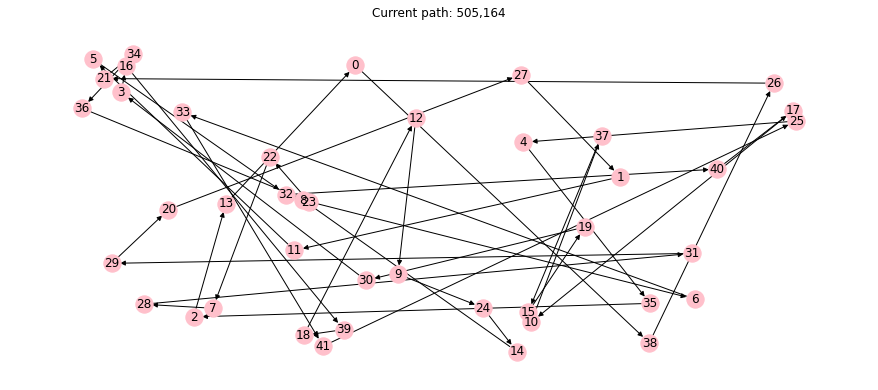

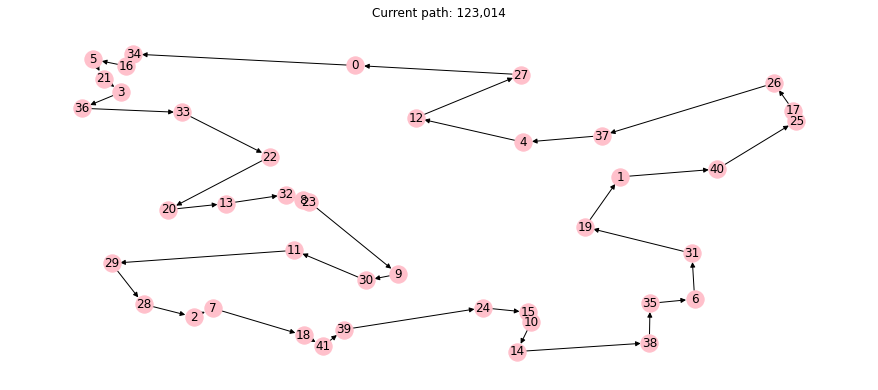

In [108]:
STEADY_STATE = 1000

solution = np.array(range(NUM_CITIES))
np.random.shuffle(solution)
solution_cost = problem.evaluate_solution(solution)
problem.plot(solution)

history = [(0, solution_cost)]
steady_state = 0
step = 0
while steady_state < STEADY_STATE:
    step += 1
    steady_state += 1
    new_solution = tweak(solution, pm=.5)
    new_solution_cost = problem.evaluate_solution(new_solution)
    if new_solution_cost < solution_cost:
        solution = new_solution
        solution_cost = new_solution_cost
        history.append((step, solution_cost))
        steady_state = 0
problem.plot(solution)